#  Lab8_A2 One-Hot-Encoding of Income Dataset

In [4]:
%matplotlib inline

from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1



## (a) Reading the dataset from a csv-file into a pandas dataframe

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
#data = pd.read_csv(
#    'IncomeDataset.csv', header=None, index_col=False,
#    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
#           'marital-status', 'occupation', 'relationship', 'race', 'gender',
#           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
#           'income'])

data = pd.read_csv('IncomeDataset.csv',skipinitialspace=True)

# For illustration purposes, we only select some of the columns:
#data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
#             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head(20))

Unnamed: 0  age         workclass  fnlwgt     education  education-num  \
0            0   39         State-gov   77516     Bachelors             13   
1            1   50  Self-emp-not-inc   83311     Bachelors             13   
2            2   38           Private  215646       HS-grad              9   
3            3   53           Private  234721          11th              7   
4            4   28           Private  338409     Bachelors             13   
5            5   37           Private  284582       Masters             14   
6            6   49           Private  160187           9th              5   
7            7   52  Self-emp-not-inc  209642       HS-grad              9   
8            8   31           Private   45781       Masters             14   
9            9   42           Private  159449     Bachelors             13   
10          10   37           Private  280464  Some-college             10   
11          11   30         State-gov  141297     Bachelors             13   
12          12   23           Private  122272     Bachelors             13   
13          13   32           Private  205019    Assoc-acdm             12   
14          14   40           Private  121772     Assoc-voc             11   
15          15   34           Private  245487       7th-8th              4   
16          16   25  Self-emp-not-inc  176756       HS-grad              9   
17          17   32           Private  186824       HS-grad              9   
18          18   38           Private   28887          11th              7   
19          19   43  Self-emp-not-inc  292175       Masters             14   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse       Craft-repair        Husband   
15     Married-civ-spouse   Transport-moving        Husband   
16          Never-married    Farming-fishing      Own-child   
17          Never-married  Machine-op-inspct      Unmarried   
18     Married-civ-spouse              Sales        Husband   
19               Divorced    Exec-managerial      Unmarried   

                  race  gender  capital-gain  capital-loss  hours-per-week  \
0                White    Male          2174             0              40   
1                White    Male             0             0              13   
2                White    Male             0             0              40   
3                Black    Male             0             0              40   
4                Black  Female             0             0              40   
5                White  Female             0             0              40   
6                Black  Female             0             0              16   
7                White    Male             0             0              45   
8                White  Female         14084             0              50   
9                White    Male          5178             0              40   
10               Black    Male             0             0              80   
11  Asian-Pac-Islander    Male             0             0              40   
12               White  Fem

## (b) Histogram, counting male and female

Draw a histogram of the age for Male and Female gender and determine how many Male
and Female are in the dataset. 

Determine how many Bachelors and Masters are in the
dataset. Hint: use the method ``value_counts`` of the ``pandas`` dataframe.

Text(0.5,0,'female age (years)')

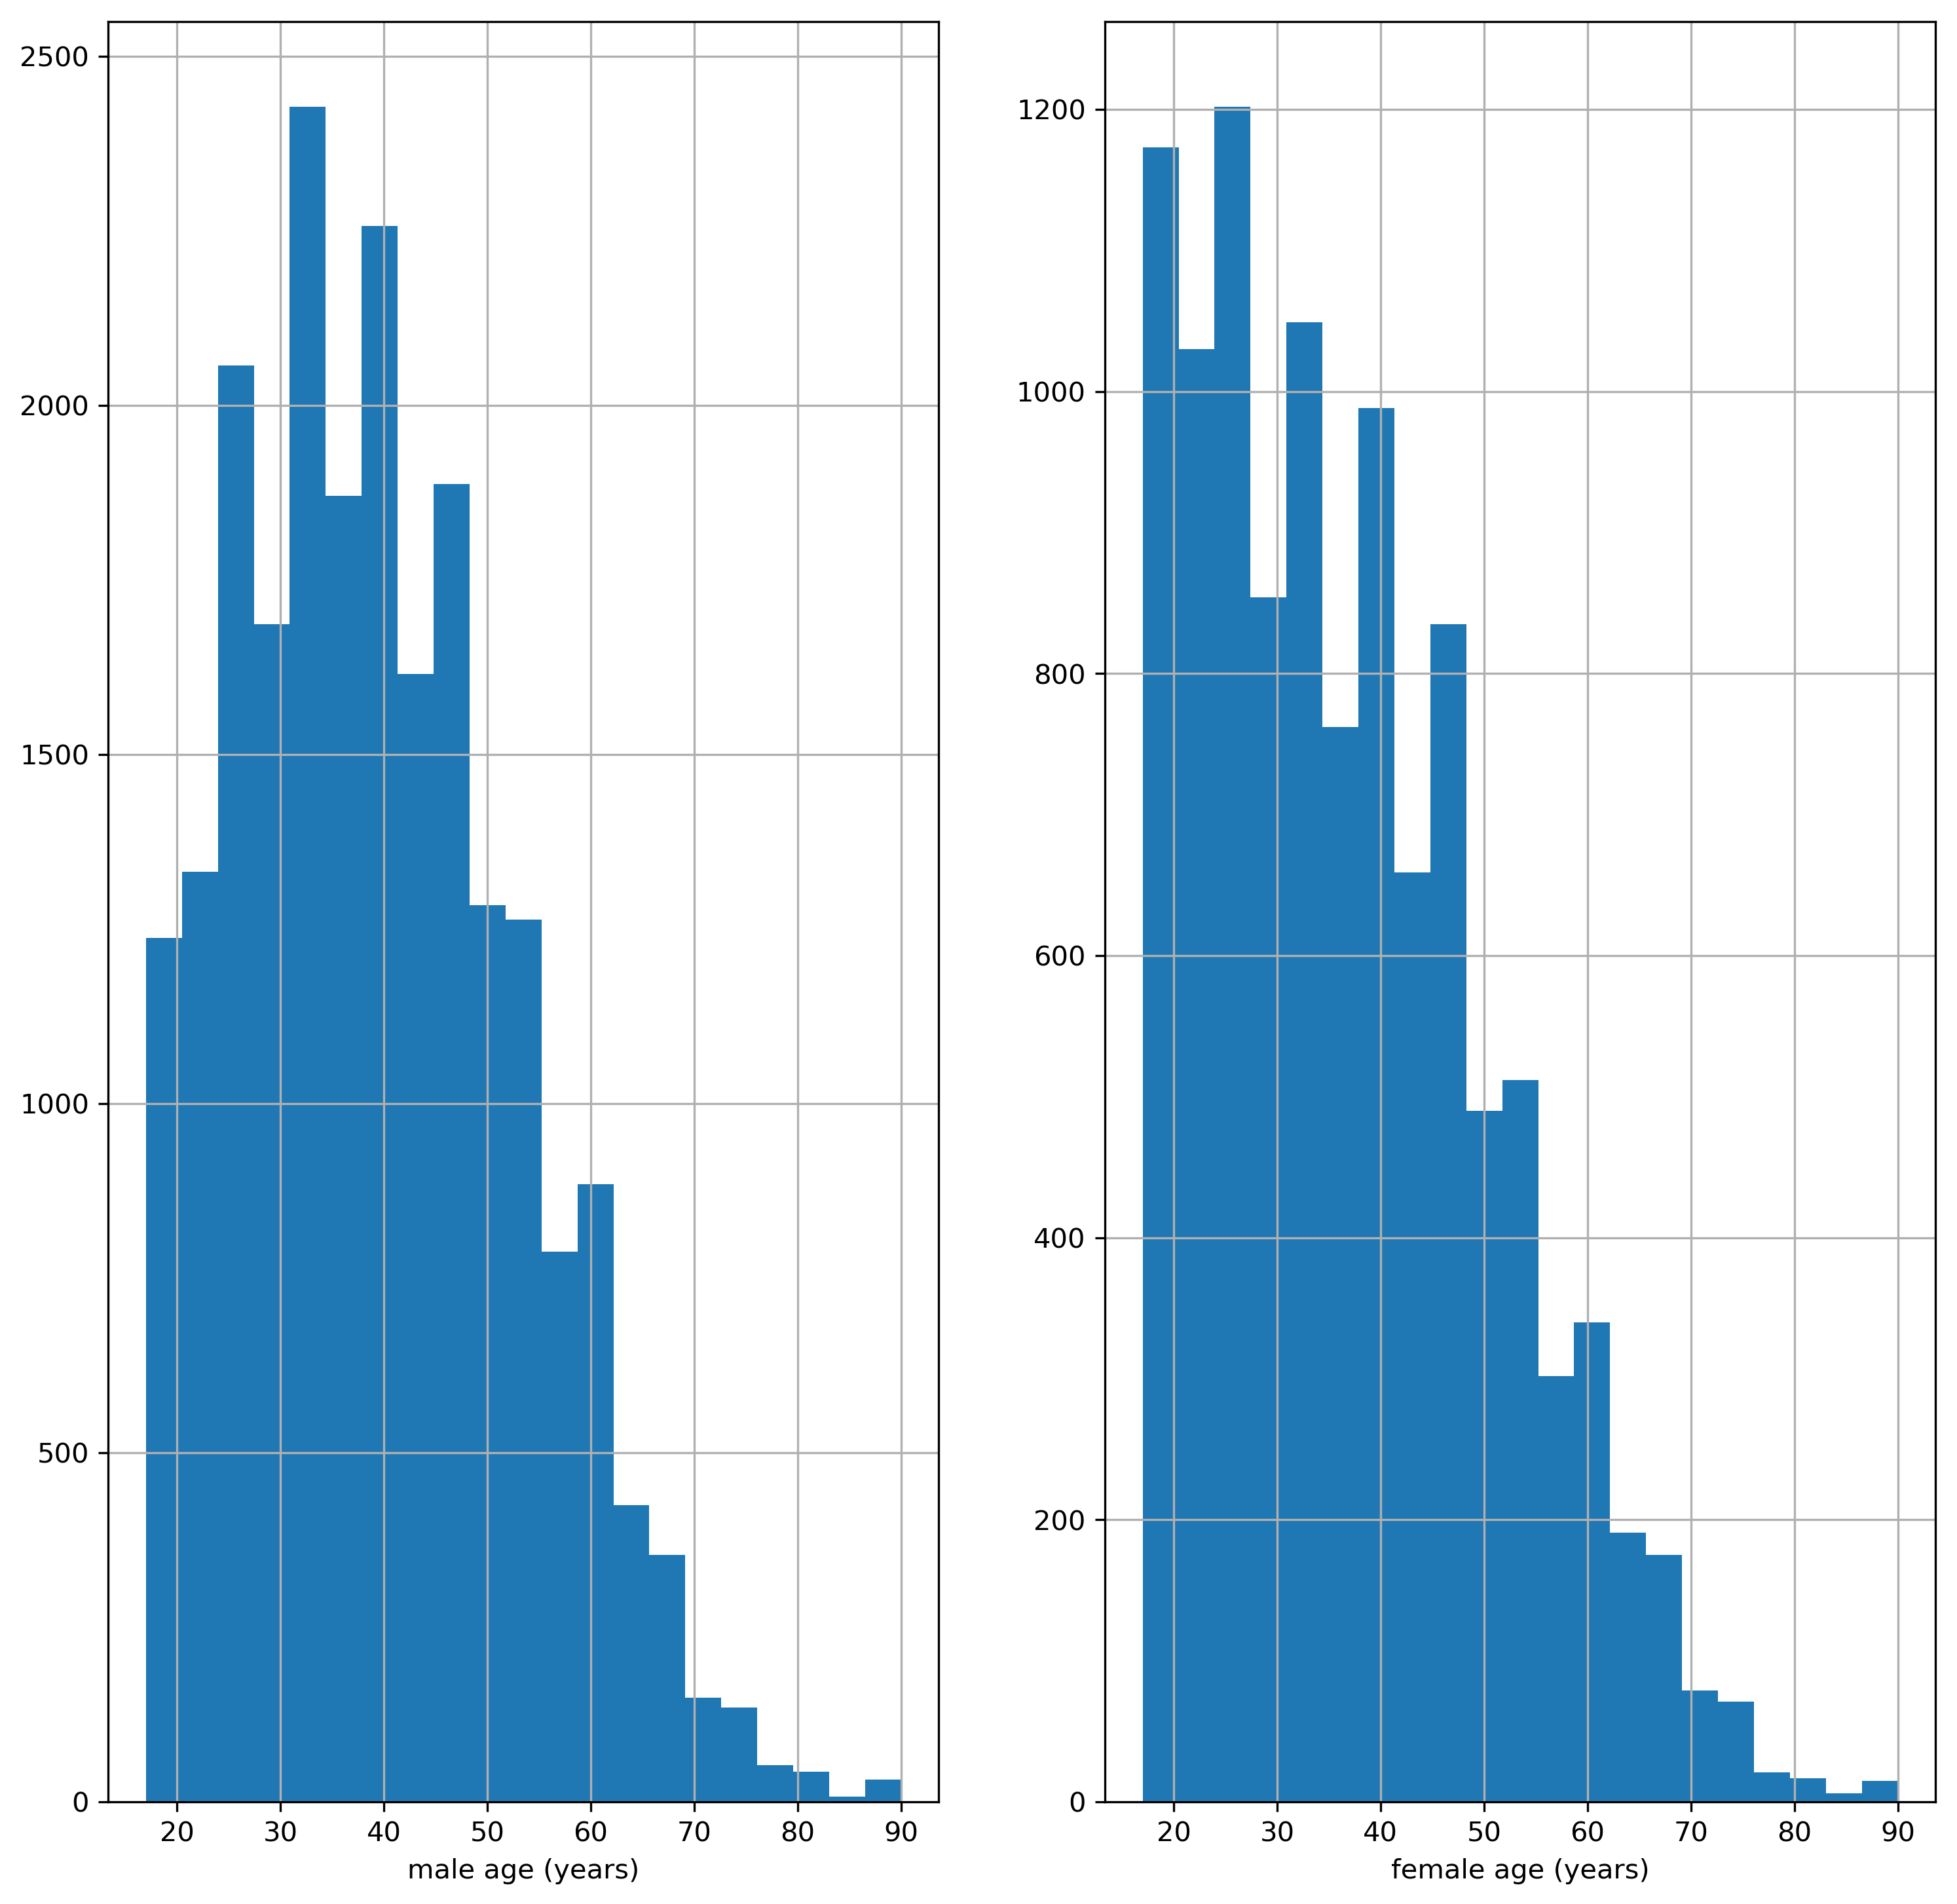

In [6]:
import matplotlib.pyplot as plt


#df_male   = data.mask(lambda x: x['gender'] == 'Male')
#df_female = data.mask(lambda x: x['gender'] == 'Female')

df_male     = data[data['gender']=='Male']
df_female   = data[data['gender']=='Female']

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.hist(df_male.age.values,bins=21)
plt.grid(True)
plt.xlabel('male age (years)')


plt.subplot(1,2,2)
plt.hist(df_female.age.values,bins=21)
plt.grid(True)
plt.xlabel('female age (years)')



In [7]:
print(data.columns)


Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


In [8]:
print(data.gender.value_counts())
print(data.education.value_counts())

Male      21790
Female    10771
Name: gender, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


## (c) creating dummy categorical variables
Convert the categorical variables into dummy or indicator variables using the get_dummies
method of the pandas dataframe. How many input dimensions does your dataset have now?
List the original features and the indicator variables, i.e. the features after the get_dummy
transformation.

In [9]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] 

Features after get_dummies:
 ['Unnamed: 0', 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-st

In [10]:
display(data_dummies.head(n=2))

Unnamed: 0  age  fnlwgt  education-num  capital-gain  capital-loss  \
0           0   39   77516             13          2174             0   
1           1   50   83311             13             0             0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0              40            0                      0                    0   
1              13            0                      0                    0   

      ...       native-country_Scotland  native-country_South  \
0     ...                             0                     0   
1     ...                             0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  income_<=50K  \
0                       0                          0             1   
1                       0                          0             1   

   income_>50K  
0            0  
1            0  

[2 rows x 111 columns]

## (d) Logistic Regression on Income using dummy variables
Apply a logistic regression classifier to the dataset using the indicator variables as input
data X and the column ’income>50k’ as response.

In [11]:
# Get only the columns containing features
# that is all columns from 'age' to 'occupation_ Transport-moving'
# This range contains all the features but not the target

features = data_dummies.loc[:, 'hours-per-week':'gender_Male']
# extract NumPy arrays
X = features.values
y = data_dummies['income_>50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 61)  y.shape: (32561,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.83


## Bonus: Feature Selection using a Random Forest Classifier

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

D:\Users\wurc\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (24420, 61)
X_train_l1.shape: (24420, 31)


([], <a list of 0 Text yticklabel objects>)

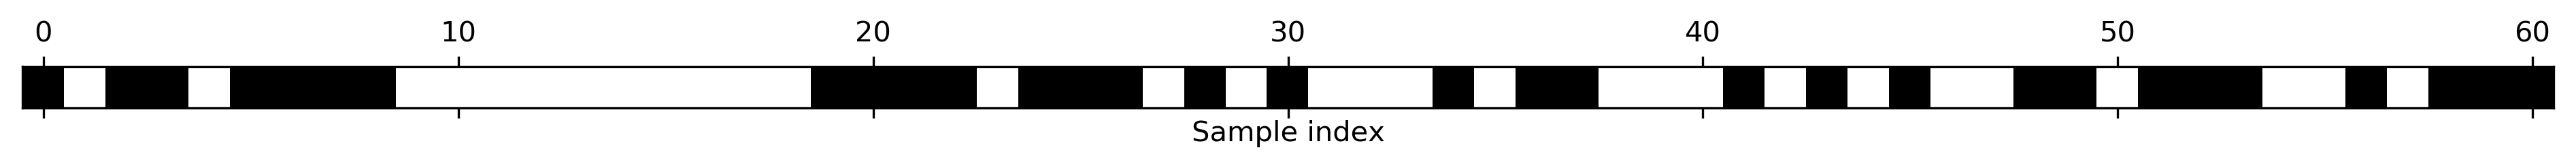

In [15]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [16]:
print(features.columns)

Index(['hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair

In [17]:
features.iloc[mask]

print(features.columns[mask])


Index(['hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Prof-school', 'education_Some-college',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_Black',
       'race_White', 'gender_Female', 'gender_Male'],
      dtype='object')
